In [27]:
from sqlalchemy import create_engine
import pandas as pd
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re


In [2]:
#Your SQL Credentials
db_username = ''
db_password = ''
db_host = 'localhost'
db_name = 'movies'

engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}/{db_name}')


df = pd.read_sql("SELECT * FROM movie_data", engine)

print(df.head())
print(df.info())

                   title  year      imdbid   type  \
0  PAW Patrol: The Movie  2021  tt11832046  movie   
1   The Loud House Movie  2021   tt6714432  movie   
2     2gether: The Movie  2021  tt14296268  movie   
3            A Cop Movie  2021  tt14035242  movie   
4   Shatagni - The Movie  2021  tt14650250  movie   

                                              poster  viewcount    rating  
0  https://m.media-amazon.com/images/M/MV5BYTJmM2...      42488  1.076572  
1  https://m.media-amazon.com/images/M/MV5BOTg4MT...      21410  8.351604  
2  https://m.media-amazon.com/images/M/MV5BNzg1Zm...      87932  2.125574  
3  https://m.media-amazon.com/images/M/MV5BZWM5OG...      80853  9.567189  
4  https://m.media-amazon.com/images/M/MV5BMTIxMz...      70369  9.571052  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      720 non-null    object 
 

In [3]:
duplicates = df.loc[df['title'].duplicated()] 

In [4]:
duplicates.iloc[:15]

,title,year,imdbid,type,poster,viewcount,rating
84,Fate/Grand Order The Movie Divine Realm Of The...,2021,tt14739280,movie,None,81563,8.640149
130,Radio - the movie,2021,tt13905650,movie,https://m.media-amazon.com/images/M/MV5BOTQ4Ym...,82504,8.091231
131,Radio - the movie,2021,tt13918878,movie,None,99310,8.424884
140,2020: The Movie,2021,tt13409450,movie,https://m.media-amazon.com/images/M/MV5BOGE0Ym...,84844,8.526261
237,The Last Survival (Movie),2021,tt16751328,movie,None,56125,5.239047
348,Blake's Movie,2022,tt16442990,movie,None,52936,7.957668
412,2022 MTV Movie & TV Awards: Unscripted,2022,tt20517046,movie,None,32070,8.433825
420,Movie Night,2022,tt23397682,movie,None,18912,9.738098
506,Baby Shark's Big Movie!,2023,tt21476884,movie,https://m.media-amazon.com/images/M/MV5BNjcyOW...,80848,3.840435
563,The Super Mario Bros. Movie (2023),2023,tt27621202,movie,https://m.media-amazon.com/images/M/MV5BOWQ5OD...,42103,7.420968


In [5]:
dupli_df = pd.DataFrame()  
for i in duplicates['title']:
    dupli = df.loc[df['title'] == i]
    dupli_df = pd.concat([dupli_df, dupli])  




In [6]:
dupli_df

,title,year,imdbid,type,poster,viewcount,rating
19,Fate/Grand Order The Movie Divine Realm Of The...,2021,tt13997358,movie,https://m.media-amazon.com/images/M/MV5BYzgyZD...,54551,4.018615
84,Fate/Grand Order The Movie Divine Realm Of The...,2021,tt14739280,movie,None,81563,8.640149
110,Radio - the movie,2021,tt14009254,movie,None,70134,4.553680
130,Radio - the movie,2021,tt13905650,movie,https://m.media-amazon.com/images/M/MV5BOTQ4Ym...,82504,8.091231
131,Radio - the movie,2021,tt13918878,movie,None,99310,8.424884
110,Radio - the movie,2021,tt14009254,movie,None,70134,4.553680
130,Radio - the movie,2021,tt13905650,movie,https://m.media-amazon.com/images/M/MV5BOTQ4Ym...,82504,8.091231
131,Radio - the movie,2021,tt13918878,movie,None,99310,8.424884
42,2020: The Movie,2021,tt14292616,movie,https://m.media-amazon.com/images/M/MV5BNTIxYj...,8443,9.790355
140,2020: The Movie,2021,tt13409450,movie,https://m.media-amazon.com/images/M/MV5BOGE0Ym...,84844,8.526261


In [7]:
len(dupli_df['imdbid'].unique())

25

So the duplicates have different IMBD id  , removing the duplicates shall be okay as the year of the movie stays the same. 

In [8]:
clean_df = df.drop_duplicates(subset=['title','year'],keep='last')

In [9]:
clean_df.reset_index(drop=True,inplace=True)

In [10]:
clean_df

,title,year,imdbid,type,poster,viewcount,rating
0,PAW Patrol: The Movie,2021,tt11832046,movie,https://m.media-amazon.com/images/M/MV5BYTJmM2...,42488,1.076572
1,The Loud House Movie,2021,tt6714432,movie,https://m.media-amazon.com/images/M/MV5BOTg4MT...,21410,8.351604
2,2gether: The Movie,2021,tt14296268,movie,https://m.media-amazon.com/images/M/MV5BNzg1Zm...,87932,2.125574
3,A Cop Movie,2021,tt14035242,movie,https://m.media-amazon.com/images/M/MV5BZWM5OG...,80853,9.567189
4,Shatagni - The Movie,2021,tt14650250,movie,https://m.media-amazon.com/images/M/MV5BMTIxMz...,70369,9.571052
...,...,...,...,...,...,...,...
703,BTOB TIME: Be Together the Movie,2023,tt30427921,movie,None,81695,4.438802
704,Pamli chori Banjara Movie,2023,tt30447965,movie,None,44820,6.170941
705,Swing the Movie,2023,tt30488118,movie,https://m.media-amazon.com/images/M/MV5BN2Q3Nj...,94462,9.655397
706,Liquor Run the Movie,2023,tt30490530,movie,https://m.media-amazon.com/images/M/MV5BNWY2MG...,75140,5.700219


In [11]:
clean_df['year']

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
703    2023
704    2023
705    2023
706    2023
707    2023
Name: year, Length: 708, dtype: int64

In [12]:
clean_df = df

In [13]:

print(df[['viewcount', 'rating']].describe())


correlation = df['viewcount'].corr(df['rating'])
print(f"Correlation between view count and rating: {correlation}")

          viewcount      rating
count    720.000000  720.000000
mean   48332.873611    5.686401
std    28363.206088    2.607950
min     1016.000000    1.051040
25%    23566.000000    3.494717
50%    47034.500000    5.763509
75%    72393.750000    8.052346
max    99825.000000    9.991859
Correlation between view count and rating: 0.039762218171034217


In [14]:
df['viewcount'] = df['viewcount'].round()

In [15]:
df['viewcount'].unique()

array([42488, 21410, 87932, 80853, 70369, 61567, 23203, 26725, 22958,
       95750, 26795, 41428, 99646, 75659, 46947, 91929, 25708, 26641,
       38666, 54551, 62601,  6464, 57694, 72304, 48993, 91963, 76756,
       44811, 41981, 12858, 92818, 91722, 10204, 68361, 23227, 68030,
       25915, 84596, 87811, 68281, 87139,  7856,  8443, 36926, 82087,
       50812, 38357, 31315, 37432, 30276, 34691, 35538, 39563, 82690,
       50937,  5252, 58982, 56503, 73940, 61681, 32632, 96616, 48994,
       16113, 97017, 64084,  9988,  2438, 21323, 77421, 26411, 60568,
       47083, 84756, 29594, 76805, 63567, 64765, 36621, 22560, 45198,
       69147, 16883, 31602, 81563, 15177, 41417,  1644, 21071,  2458,
       12986, 88110, 42924, 69059, 99825, 60410, 92301, 51829, 74984,
       74302, 81374, 47930,  4556, 85263, 77916, 42677, 88349, 55525,
       38875, 14426, 70134, 35285, 67265, 70800,  2201, 79406, 86277,
       38700, 61850, 24635, 72184, 83764, 64164, 82916, 58234, 50767,
       27320, 36649,

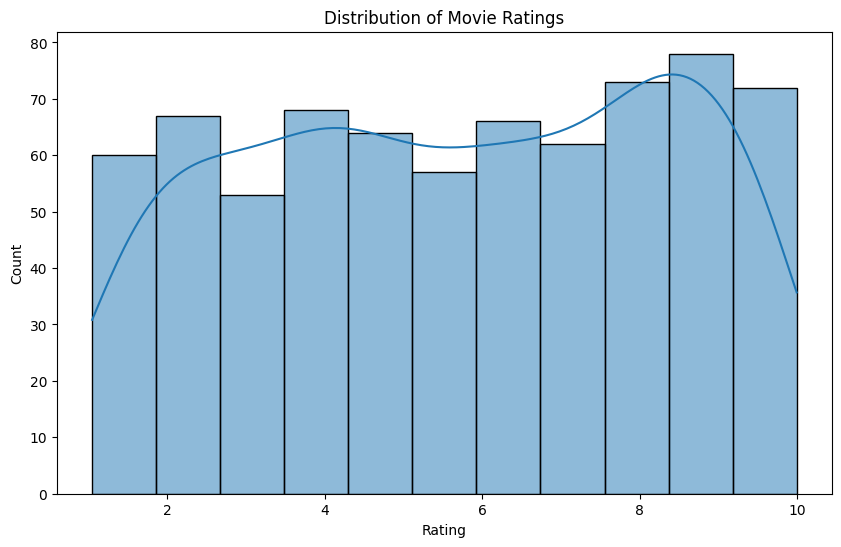

In [16]:

# 1. Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_distribution.png')

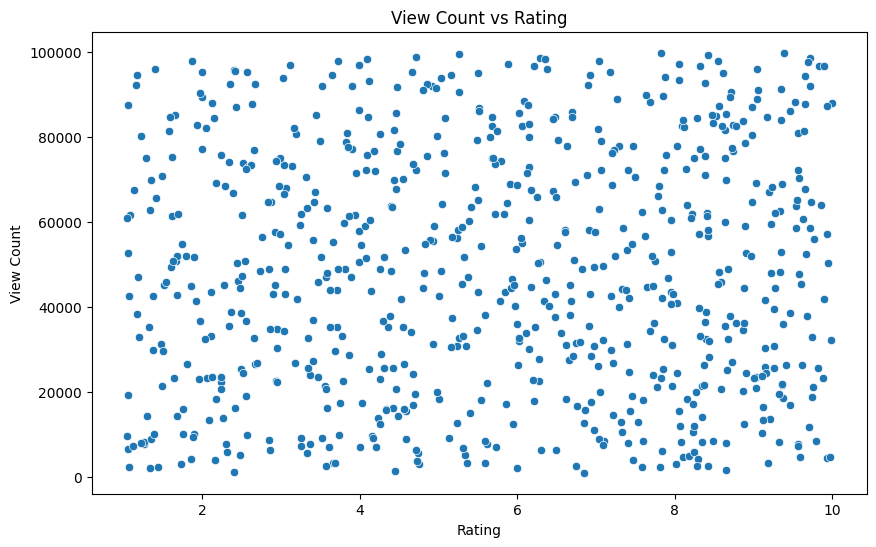

In [17]:
# 2. Scatter plot of view count vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='viewcount', data=df)
plt.title('View Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('View Count')
plt.savefig('viewcount_vs_rating.png')

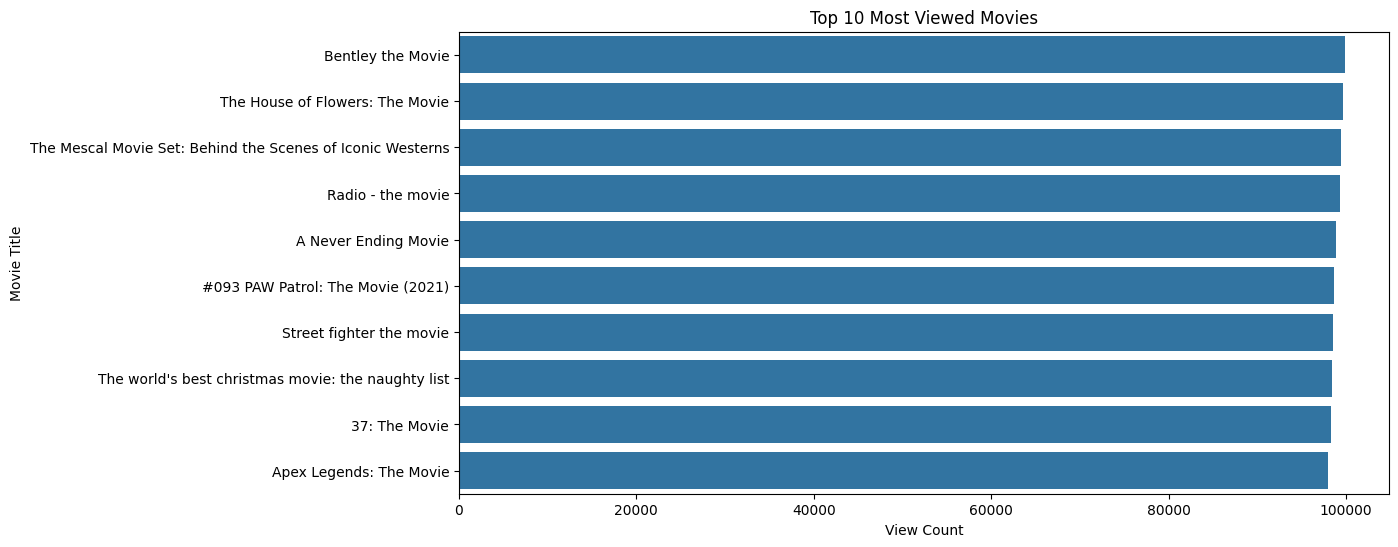

In [18]:
# 3. Top 10 most viewed movies
top_10 = df.nlargest(10, 'viewcount')
plt.figure(figsize=(12, 6))
sns.barplot(x='viewcount', y='title', data=top_10)
plt.title('Top 10 Most Viewed Movies')
plt.xlabel('View Count')
plt.ylabel('Movie Title')
plt.savefig('top_10_viewed.png')

In [19]:
df['year']

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
715    2023
716    2023
717    2023
718    2023
719    2023
Name: year, Length: 720, dtype: int64

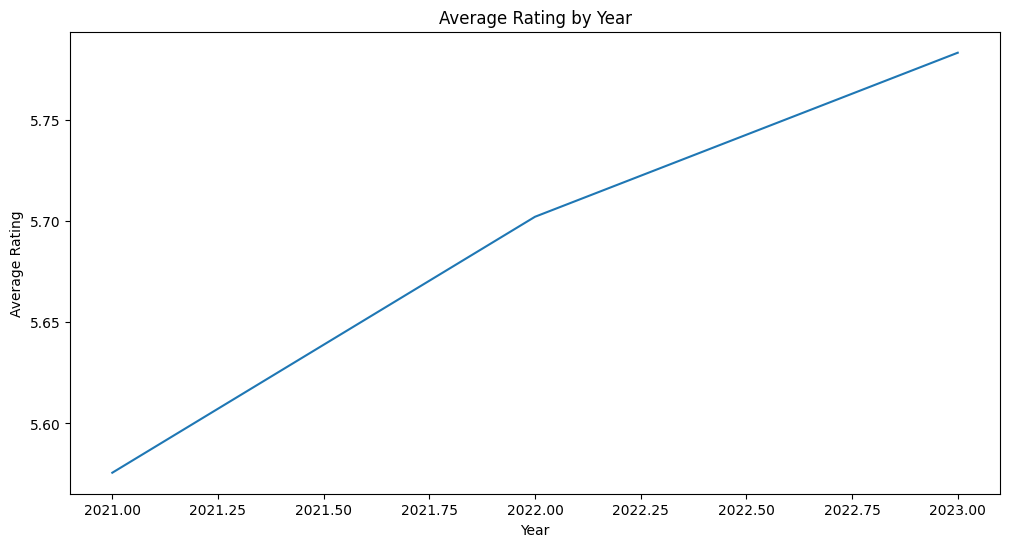

In [20]:
# 4. Average rating by year

yearly_avg = df.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=yearly_avg)
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.savefig('avg_rating_by_year.png')




In [21]:
# Calculate some key metrics
avg_rating = df['rating'].mean()
most_viewed = df.loc[df['viewcount'].idxmax()]
highest_rated = df.loc[df['rating'].idxmax()]

print(f"Average movie rating: {avg_rating:.2f}")
print(f"Most viewed movie: {most_viewed['title']} with {most_viewed['viewcount']} views")
print(f"Highest rated movie: {highest_rated['title']} with a rating of {highest_rated['rating']}")

# Identify trends
trend = yearly_avg['rating'].iloc[-1] - yearly_avg['rating'].iloc[0]
print(f"Overall trend in ratings from {yearly_avg['year'].min()} to {yearly_avg['year'].max()}: {'Increasing' if trend > 0 else 'Decreasing'}") #Doesnt make sense identify

# Recommendation based on insights
if correlation > 0.5:
    print("Recommendation: Focus on promoting highly-rated movies to increase viewership.")
elif correlation < -0.5:
    print("Recommendation: Investigate factors causing popular movies to have lower ratings.")
else:
    print("Recommendation: View count and rating appear to be independent. Consider other factors for promotion strategies.")

Average movie rating: 5.69
Most viewed movie: Bentley the Movie with 99825 views
Highest rated movie: Road Trippin: The Movie with a rating of 9.991858633060025
Overall trend in ratings from 2021 to 2023: Increasing
Recommendation: View count and rating appear to be independent. Consider other factors for promotion strategies.


This is consistent with our code since we have generated random features labelled viewcount, recommendation

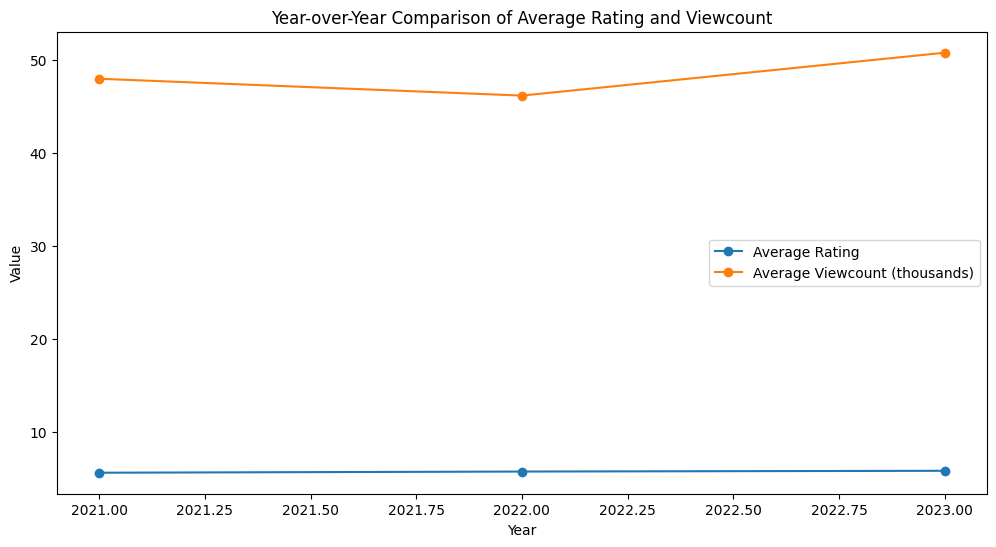

In [23]:

yearly_avg = df.groupby('year').agg({
    'rating': 'mean',
    'viewcount': 'mean'
}).reset_index()

# Create a line plot for year-over-year comparison
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['year'], yearly_avg['rating'], marker='o', label='Average Rating')
plt.plot(yearly_avg['year'], yearly_avg['viewcount'] / 1000, marker='o', label='Average Viewcount (thousands)')
plt.title('Year-over-Year Comparison of Average Rating and Viewcount')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
# plt.savefig('year_over_year_comparison.png')
# plt.close()


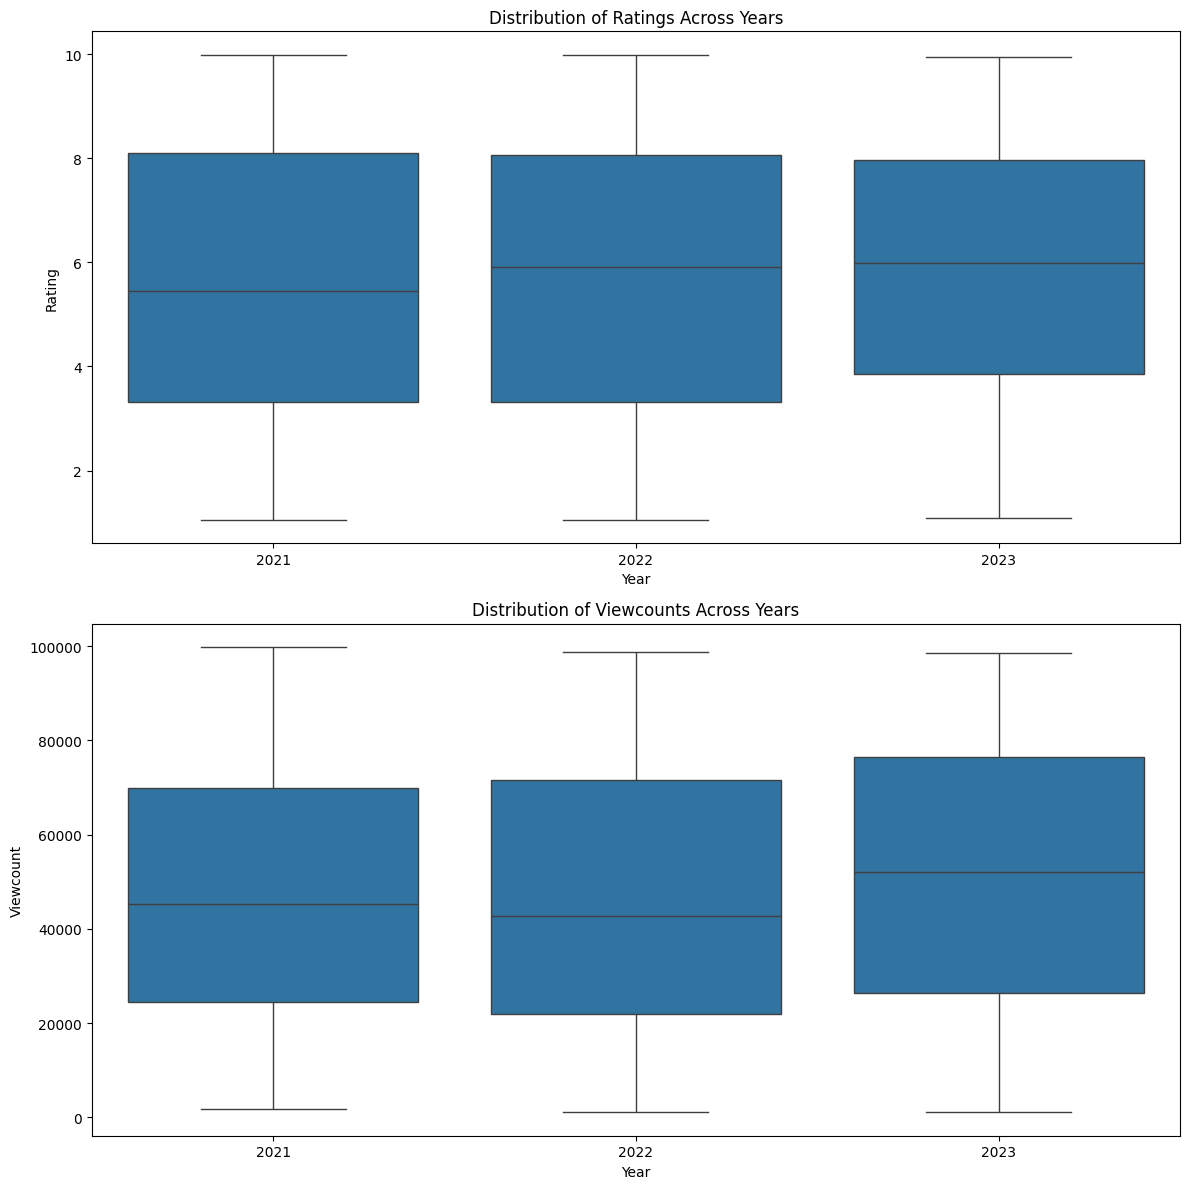

In [25]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Ratings box plot
sns.boxplot(x='year', y='rating', data=df, ax=ax1)
ax1.set_title('Distribution of Ratings Across Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rating')

# Viewcount box plot
sns.boxplot(x='year', y='viewcount', data=df, ax=ax2)
ax2.set_title('Distribution of Viewcounts Across Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Viewcount')

plt.tight_layout()
# plt.savefig('ratings_viewcounts_boxplots.png')
# plt.close()


In [28]:


def extract_words(title):
    return re.findall(r'\w+', title.lower())


all_words = [word for title in df['title'] for word in extract_words(title)]
word_counts = Counter(all_words)


top_words = dict(word_counts.most_common(20))


word_stats = {}
for word in top_words:
    movies_with_word = df[df['title'].str.contains(word, case=False)]
    word_stats[word] = {
        'count': top_words[word],
        'avg_rating': movies_with_word['rating'].mean(),
        'avg_viewcount': movies_with_word['viewcount'].mean()
    }


word_stats_df = pd.DataFrame.from_dict(word_stats, orient='index')
word_stats_df = word_stats_df.sort_values('count', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(word_stats_df.index, word_stats_df['count'])
plt.title('Top 20 Most Common Words in Movie Titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.savefig('title_word_frequencies.png')
# plt.close()


plt.figure(figsize=(12, 6))
plt.scatter(word_stats_df['avg_rating'], word_stats_df['avg_viewcount'] / 1000, s=word_stats_df['count'])
for word, row in word_stats_df.iterrows():
    plt.annotate(word, (row['avg_rating'], row['avg_viewcount'] / 1000))
plt.title('Relationship Between Average Rating and Viewcount for Common Title Words')
plt.xlabel('Average Rating')
plt.ylabel('Average Viewcount (thousands)')
plt.tight_layout()
# plt.savefig('title_word_stats.png')
# plt.close()
